# Prepare Data (read, transform, compute sentiment, join...)

In [72]:
import pandas as pd
from textblob import TextBlob

# Articles-File laden
# Data columns (total 4 columns):
# index        1324 non-null int64
# articleID    1324 non-null object
# webURL       1324 non-null object
# article      1324 non-null object

filename_articles = r'/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/FullArticlesApril2018.csv'
df_articles = pd.read_csv(filename_articles, encoding='utf-8', low_memory=False)

# Comments-File laden
# approveDate              264924 non-null int64
# articleID                264924 non-null object
# articleWordCount         264924 non-null float64
# commentBody              264924 non-null object
# commentID                264924 non-null float64
# commentSequence          264924 non-null float64
# commentTitle             264911 non-null object
# commentType              264924 non-null object
# createDate               264924 non-null int64
# depth                    264924 non-null float64
# editorsSelection         264924 non-null bool
# inReplyTo                264924 non-null float64
# newDesk                  264924 non-null object
# parentID                 264924 non-null float64
# parentUserDisplayName    83875 non-null object
# permID                   264904 non-null object
# picURL                   264924 non-null object
# printPage                264924 non-null float64
# recommendations          264924 non-null int64
# recommendedFlag          0 non-null float64
# replyCount               264924 non-null int64
# reportAbuseFlag          0#  non-null float64
# sectionName              264924 non-null object
# sharing                  264924 non-null int64
# status                   264924 non-null object
# timespeople              264924 non-null int64
# trusted                  264924 non-null int64
# typeOfMaterial           264924 non-null object
# updateDate               264924 non-null int64
# userDisplayName          264824 non-null object
# userID                   264924 non-null float64
# userLocation             264786 non-null object
# userTitle                100 non-null object
# userURL                  0 non-null float64

filename_comments = r'/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/nyt-comments/CommentsApril2018.csv'
df_comments = pd.read_csv(filename_comments, encoding='utf-8', low_memory=False)


### TEMP MAKE PROCESSING FAST ###

#df_articles = df_articles.iloc[0:1000]
#df_comments = df_comments.iloc[0:1000]

### FUNCTIONS ###

def compute_sentiment(articles):
    
    sentiments = []
    for art in articles:
        blob = TextBlob(art)
        sentiments.append(blob.sentiment.polarity)
    
    return sentiments

### MAIN ###
    
df_articles['sentiment_article'] = compute_sentiment(df_articles['article'])
df_comments['sentiment_comment'] = compute_sentiment(df_comments['commentBody'])

df = pd.merge(df_articles, df_comments, on='articleID')

df.to_csv('/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/comments-and-articles-join.csv')

# Article Sentiment vs. Comment Sentiment 

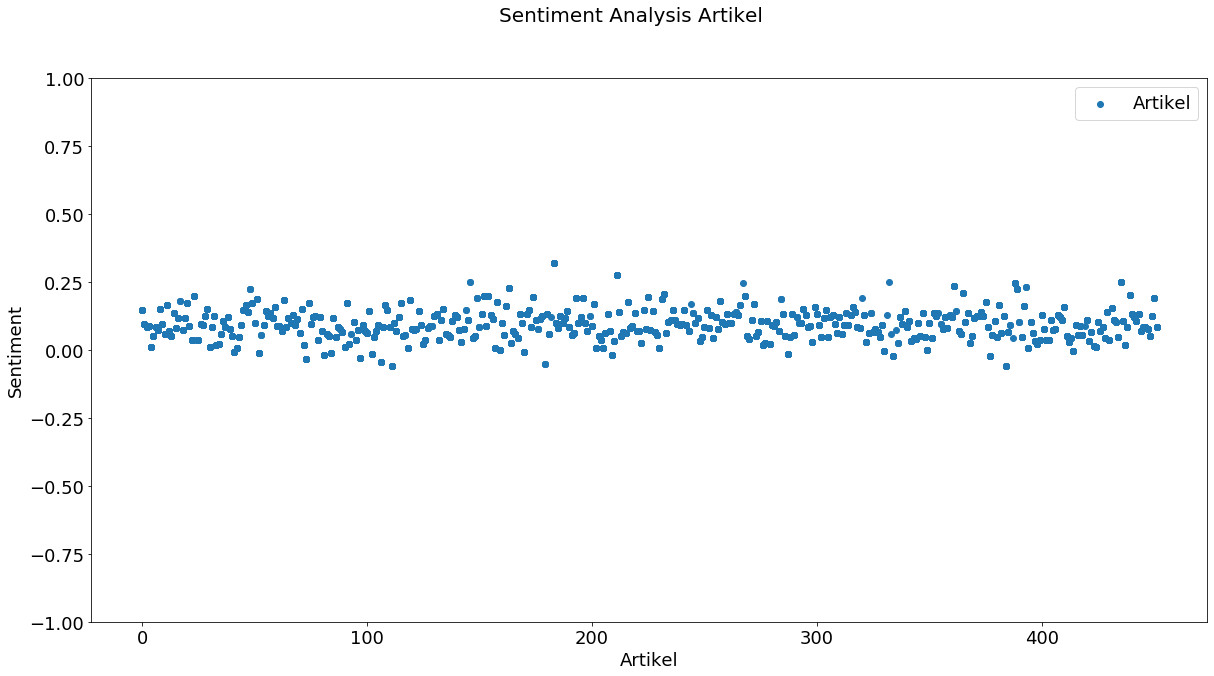

In [172]:
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/comments-and-articles-join.csv')

# Defines How many articles / comments should actually be shown
df = df.iloc[0:100000]

df = df[['articleID', 'userID', 'sentiment_comment', 'sentiment_article']]

##### USERID_GENERATOR #####
user_list = df['articleID']
userid = 0
user_storage = 0
new_user_list = []
for user in user_list:
    if user_storage == 0: 
        user_storage = user
        new_user_list.append(userid)
    elif user == user_storage:
        new_user_list.append(userid)
    else:
        user_storage = user
        userid = userid + 1
        new_user_list.append(userid)

df['newarticleID'] = new_user_list
##### USERID_GENERATOR #####

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

plt.figure(figsize=(20,10)).suptitle('Sentiment Analysis Artikel / Kommentare', fontsize=20)
plt.xlabel('Artikel / Kommentare', fontsize=18)
plt.ylabel('Sentiment', fontsize=18)
plt.ylim(-1, 1)
plt.scatter(df['newarticleID'],df['sentiment_comment'],label="Kommentare")
plt.scatter(df['newarticleID'],df['sentiment_article'],label="Artikel")
plt.legend(fontsize=18)
plt.show()


# Highest Article Sentiment

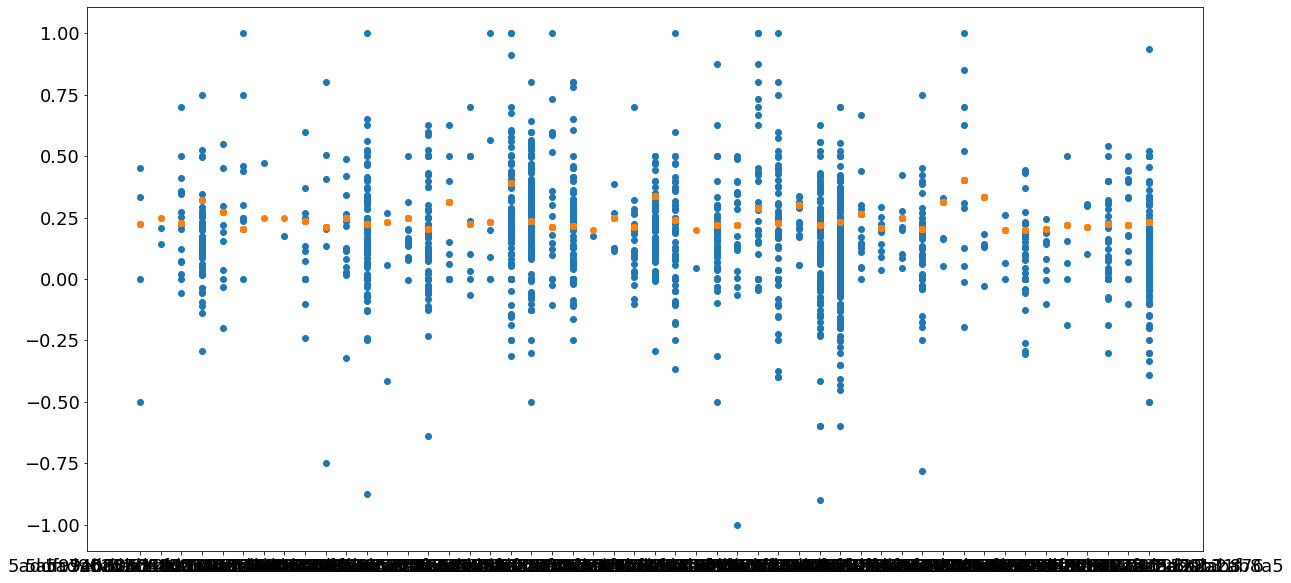

In [174]:
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/comments-and-articles-join.csv')

# Defines How many articles / comments should actually be shown

df = df[['articleID', 'userID', 'sentiment_comment', 'sentiment_article']]

df = df[df['sentiment_article'] > 0.20 ]

plt.figure(figsize=(20,10))
plt.scatter(df['articleID'],df['sentiment_comment'])
plt.scatter(df['articleID'],df['sentiment_article'])
plt.show()


# Sentiment Analysis of writing maniacs (users with many comments)

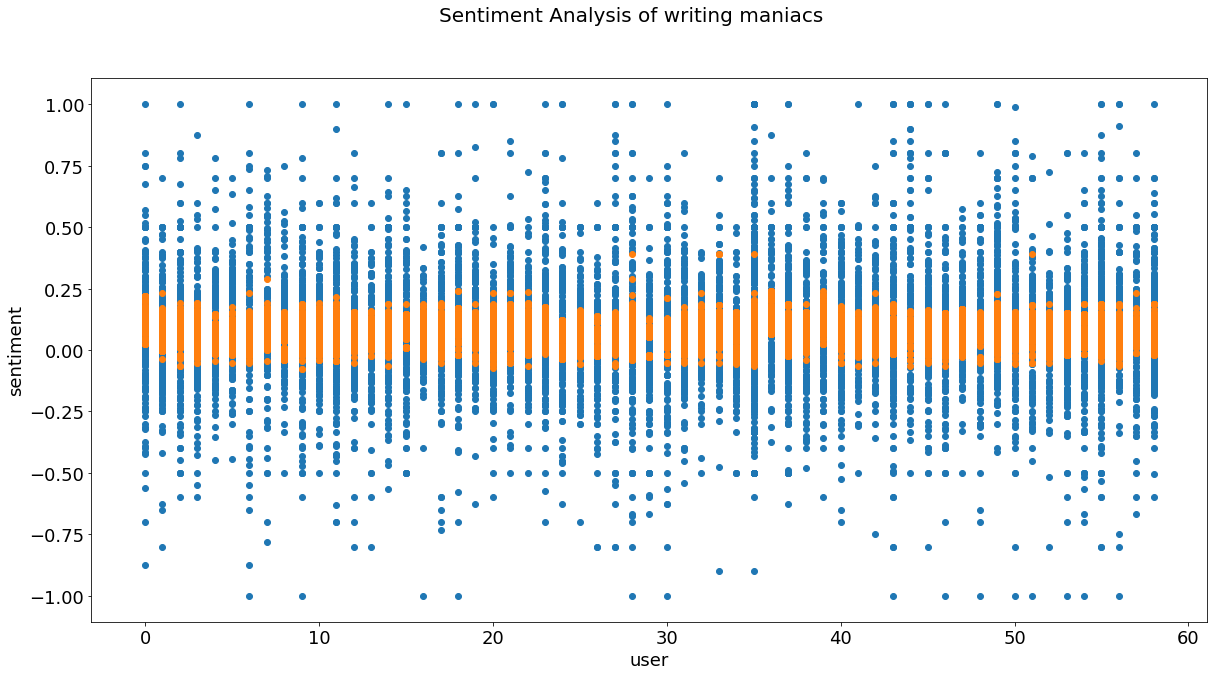

In [173]:
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/comments-and-articles-join.csv')

#df = df[['articleID', 'userID', 'sentiment_comment', 'commentID']]
#df = df.sort_values('userID')

df2 = df[['userID', 'commentID', 'sentiment_comment', 'sentiment_article']]
df3 = df2.groupby('userID').agg(
    {'sentiment_comment': ['mean', 'median', 'count'],
    })

df3 = df3.sort_values(('sentiment_comment', 'count'))

df3 = df3[df3[('sentiment_comment', 'count')] > 150 ]

list_userid = df3.index

df4 = df2[df2['userID'].isin(list_userid)]
df4 = df4.sort_values('userID')

##### USERID_GENERATOR #####
user_list = df4['userID']
userid = 0
user_storage = 0
new_user_list = []
for user in user_list:
    if user_storage == 0: 
        user_storage = user
        new_user_list.append(userid)
    elif user == user_storage:
        new_user_list.append(userid)
    else:
        user_storage = user
        userid = userid + 1
        new_user_list.append(userid)

df4['newuserID'] = new_user_list
##### USERID_GENERATOR #####


#df4 = df4.iloc[0:1000]
plt.figure(figsize=(20,10)).suptitle('Sentiment Analysis of writing maniacs', fontsize=20)
plt.xlabel('user', fontsize=18)
plt.ylabel('sentiment', fontsize=18)
plt.scatter(df4['newuserID'],df4['sentiment_comment'])
plt.scatter(df4['newuserID'],df4['sentiment_article'])
plt.show()

# Sentiments by comment author

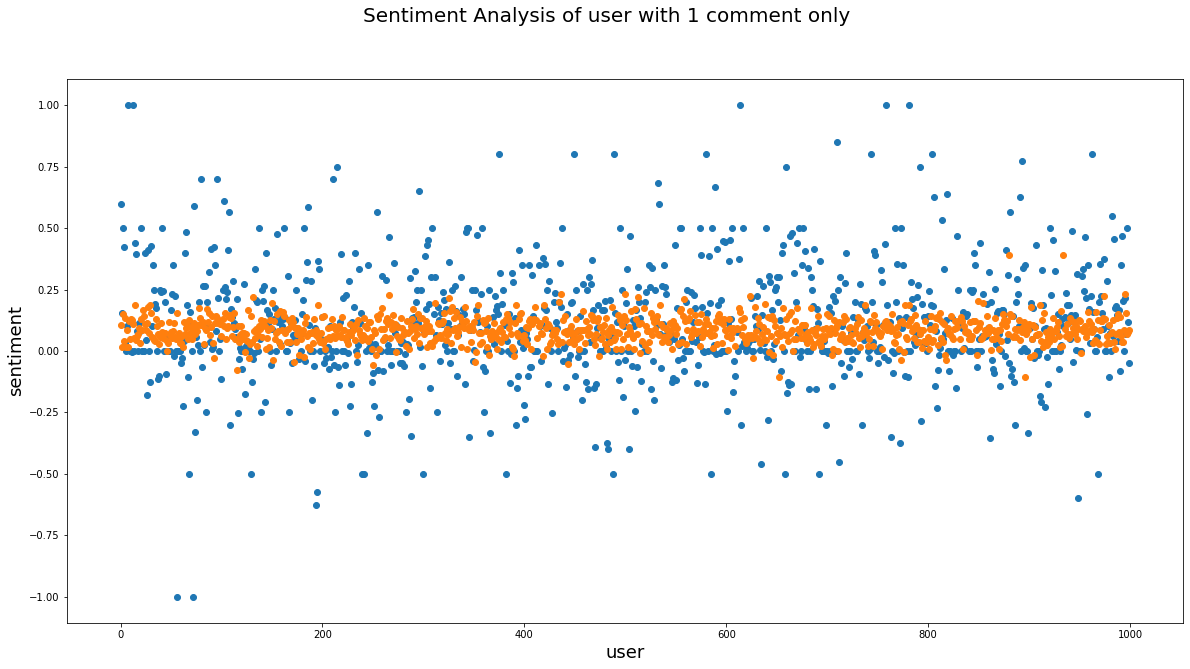

In [159]:
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/Users/sis/Documents/ZHAW/03_Information_Retrieval/Project/ir_nyt/comments-and-articles-join.csv')

#df = df[['articleID', 'userID', 'sentiment_comment', 'commentID']]
#df = df.sort_values('userID')

df2 = df[['userID', 'commentID', 'sentiment_comment', 'sentiment_article']]
df3 = df2.groupby('userID').agg(
    {'sentiment_comment': ['mean', 'median', 'count'],
    })

df3 = df3.sort_values(('sentiment_comment', 'count'))

df3 = df3[df3[('sentiment_comment', 'count')] == 1 ]

list_userid = df3.index

df4 = df2[df2['userID'].isin(list_userid)]
df4 = df4.sort_values('userID')

##### USERID_GENERATOR #####
user_list = df4['userID']
userid = 0
user_storage = 0
new_user_list = []
for user in user_list:
    if user_storage == 0: 
        user_storage = user
        new_user_list.append(userid)
    elif user == user_storage:
        new_user_list.append(userid)
    else:
        user_storage = user
        userid = userid + 1
        new_user_list.append(userid)

df4['newuserID'] = new_user_list
##### USERID_GENERATOR #####


df4 = df4.iloc[0:1000]

plt.figure(figsize=(20,10)).suptitle('Sentiment Analysis of user with 1 comment only', fontsize=20)
plt.xlabel('user', fontsize=18)
plt.ylabel('sentiment', fontsize=18)
plt.scatter(df4['newuserID'],df4['sentiment_comment'])
plt.scatter(df4['newuserID'],df4['sentiment_article'])
plt.show()